In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tqdm
from hebbian_learning import *

c:\Users\Elbert\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Question 1 - Pattern Formation by Hebbian Learning

### Exercise 1 - Hebbian Learning on Correlated Signals

(2, 100000)
(2, 2)


C:\Users\Elbert\AppData\Local\Temp\ipykernel_18652\3879588514.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


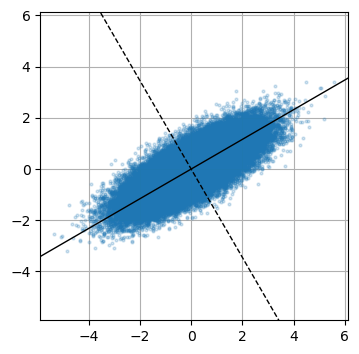

In [33]:
# (a) Building correlated inputs matrix
T = 100_000 # t=0,...,100,000
X = corr_input(T=T) # correlated inputs, xt
print(X.shape)

# (b) Covariance matrix of input matrix X
C = X @ X.T / T # time-averaged covariance matrix of inputs
print(C.shape)
eValues, eVectors = np.linalg.eig(C)

fig, ax = plt.subplots(1, figsize=[6,4])
scatter(X, eVectors[:,0], ax)
ax.grid(zorder=0)
fig.show()

#### Learn W function

In [46]:
def learnW(X, eta, K, N=30):
    # (c) Function to simulate Hebbian learning in the feedforward synaptic weights
    T = X.shape[1]
    T1 = T // 200

    # i)
    W = np.random.randn(N, 2)
    W = normalize_W(W)

    WStore = np.zeros((T1,N,2))
    for t in range(T):
        Xt = X[:,t:t+1]
        # ii)
        u = W @ Xt
        y = K @ u
        # iii)
        W += eta * y @ Xt.T
        W = normalize_W(W)
        # iv)
        if t%200 == 0:
            WStore[t//200,:,:] = W
    
    return WStore

# (d) Running learnW for signals X with learning rate eta=1e-4
N = 30
K = np.diag(np.ones(N))
WStore1 = learnW(X, 1e-4, K, N) # (T1,N,2)

C:\Users\Elbert\AppData\Local\Temp\ipykernel_18652\2101716214.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


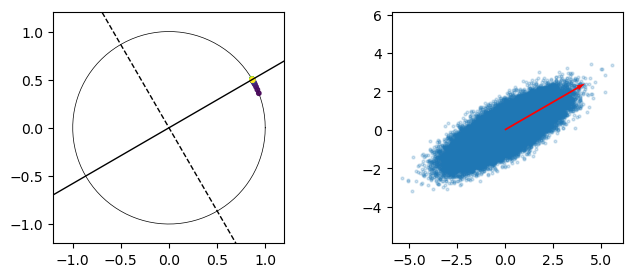

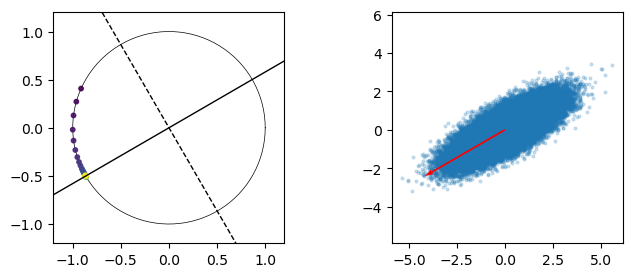

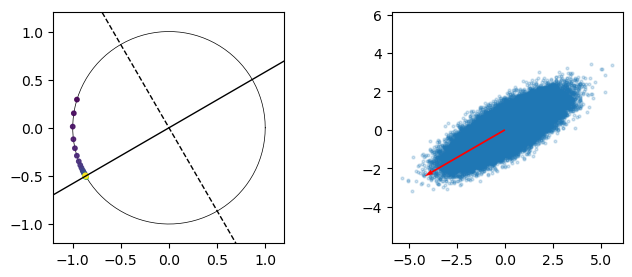

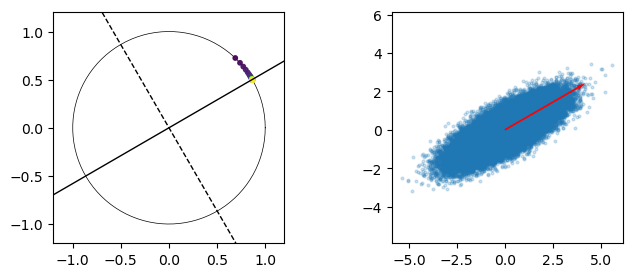

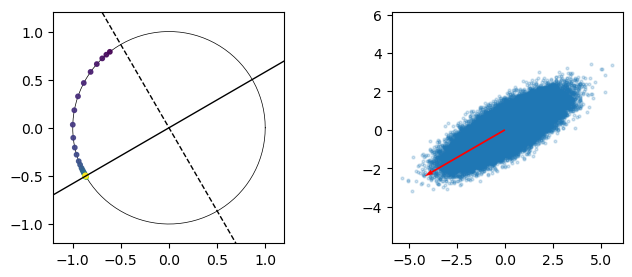

In [47]:
postSynNeurons = [1,2,3,4,5]
for neuron in postSynNeurons:
    fig, axs = plot_results(X, WStore1[:,neuron,:], eVectors[:,0], skip_step=10)
    fig.show()

### Exercise 2 - Map Formation in a Two-Layer Network

(30, 30)


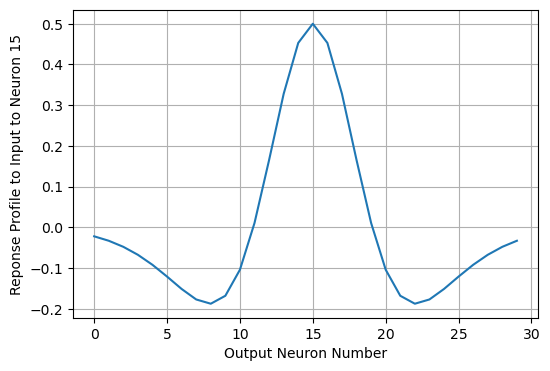

In [48]:
# (a)
K = make_K(N)
print(K.shape)
plt.figure(figsize=[6,4])
plt.plot(K[:,int(N/2)])
plt.xlabel('Output Neuron Number')
plt.ylabel(f'Reponse Profile to Input to Neuron {int(N/2)}')
plt.grid()
plt.show()

C:\Users\Elbert\AppData\Local\Temp\ipykernel_18652\3042742811.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


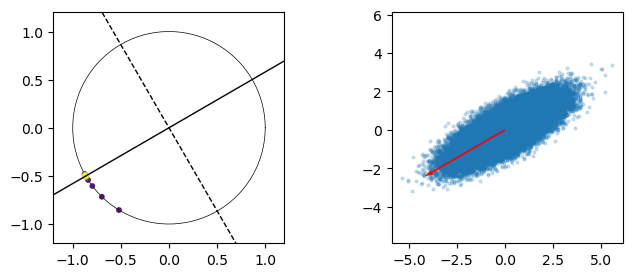

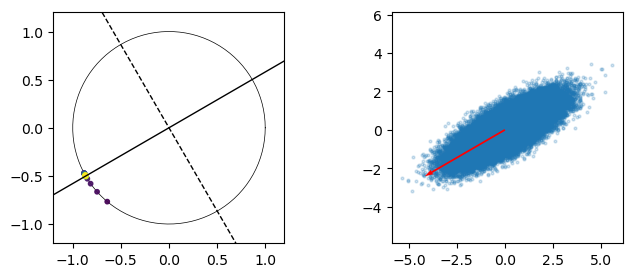

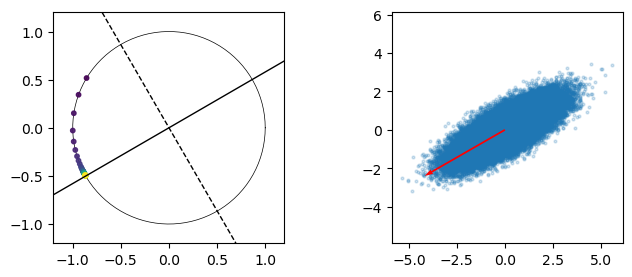

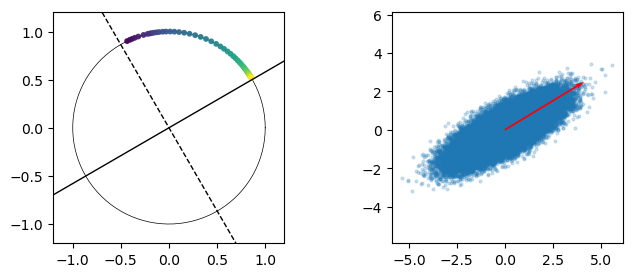

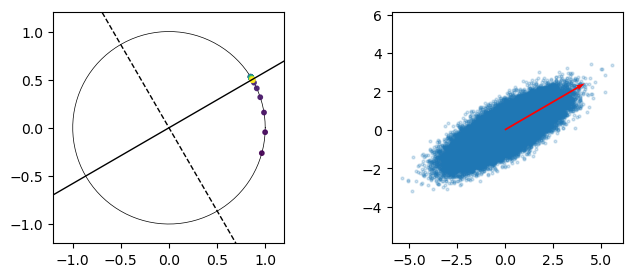

In [49]:
# (b) Running learnW with a non-identity K matrix
WStore2 = learnW(X, 1e-4, K, N) # (T1,N,2)

postSynNeurons = [1,2,3,4,5]
for neuron in postSynNeurons:
    fig, axs = plot_results(X, WStore2[:,neuron,:], eVectors[:,0], skip_step=10)
    fig.show()

(30,)
(30,)


C:\Users\Elbert\AppData\Local\Temp\ipykernel_18652\3449439662.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(w_pad=1.5)


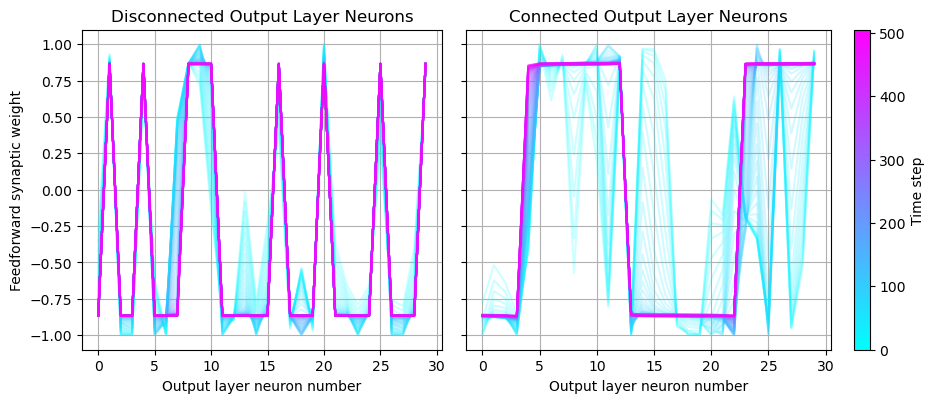

In [129]:
# (c)
W1 = WStore1[-1,:,:] # Weights at final timestep
W2 = WStore2[-1,:,:]
s1 = W1 @ eVectors[:,0]
s2 = W2 @ eVectors[:,0]
print(s1.shape)
print(s2.shape)

fig = plt.figure(figsize=[12,4])
ax = [plt.axes([0.1, 0.1, 0.3, 0.8]), plt.axes([0.42, 0.1, 0.38, 0.8])]
timesteps2Plot = np.arange(0,WStore1.shape[0],5)

for i, timestep in enumerate(timesteps2Plot):
    ax[0].plot(WStore1[timestep,:,0].T, c=plt.cm.cool(i/len(timesteps2Plot)), alpha=0.2)
    ax[1].plot(WStore2[timestep,:,0].T, c=plt.cm.cool(i/len(timesteps2Plot)), alpha=0.2)
for axis in ax:
    axis.grid()
    axis.set_ylim(-1.1, 1.1)
    axis.set_xlabel('Output layer neuron number')
ax[0].set_ylabel('Feedforward synaptic weight')
ax[1].set_yticklabels([])
ax[0].set_title('Disconnected Output Layer Neurons')
ax[1].set_title('Connected Output Layer Neurons')
fig.colorbar(plt.cm.ScalarMappable(cmap='cool', norm=plt.Normalize(0, timesteps2Plot[-1]+10)), label='Time step')
fig.tight_layout(w_pad=1.5)


plt.show()



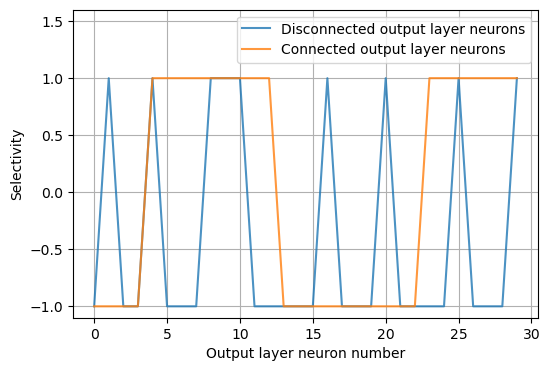

In [126]:
plt.figure(figsize=[6,4])
plt.plot(s1, alpha=0.8, label='Disconnected output layer neurons')
plt.plot(s2, alpha=0.8, label='Connected output layer neurons')

plt.ylim(-1.1, 1.6)
plt.xlabel('Output layer neuron number')
plt.ylabel('Selectivity')
plt.grid()
plt.legend(loc='upper right')
plt.show()

# Question 2 - Representational Learning